## What are Outliers?

An outlier is an observation that is unlike the other observations.

It is rare, or distinct, or does not fit in some way.
<br>

Outliers can have many causes, such as:

* Measurement or input error.

* Data corruption.

* True outlier observation (e.g. Michael Jordan in basketball).

## Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# for plotting
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

In [5]:
# Boston Crime Rate Dataset
from sklearn.datasets import load_boston

In [40]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


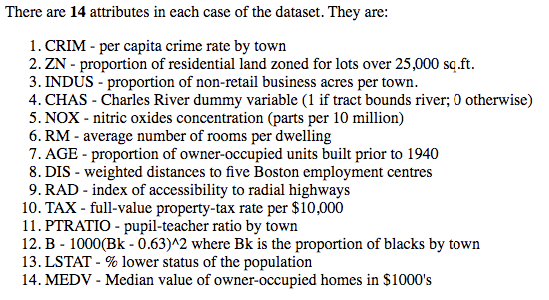

In [7]:
#creating a copy to be used later
boston_df_o = boston_df
boston_df.shape

(506, 13)

# **Dealing With outliers**

**Boxplot** is a very useful tool in detecting outliers

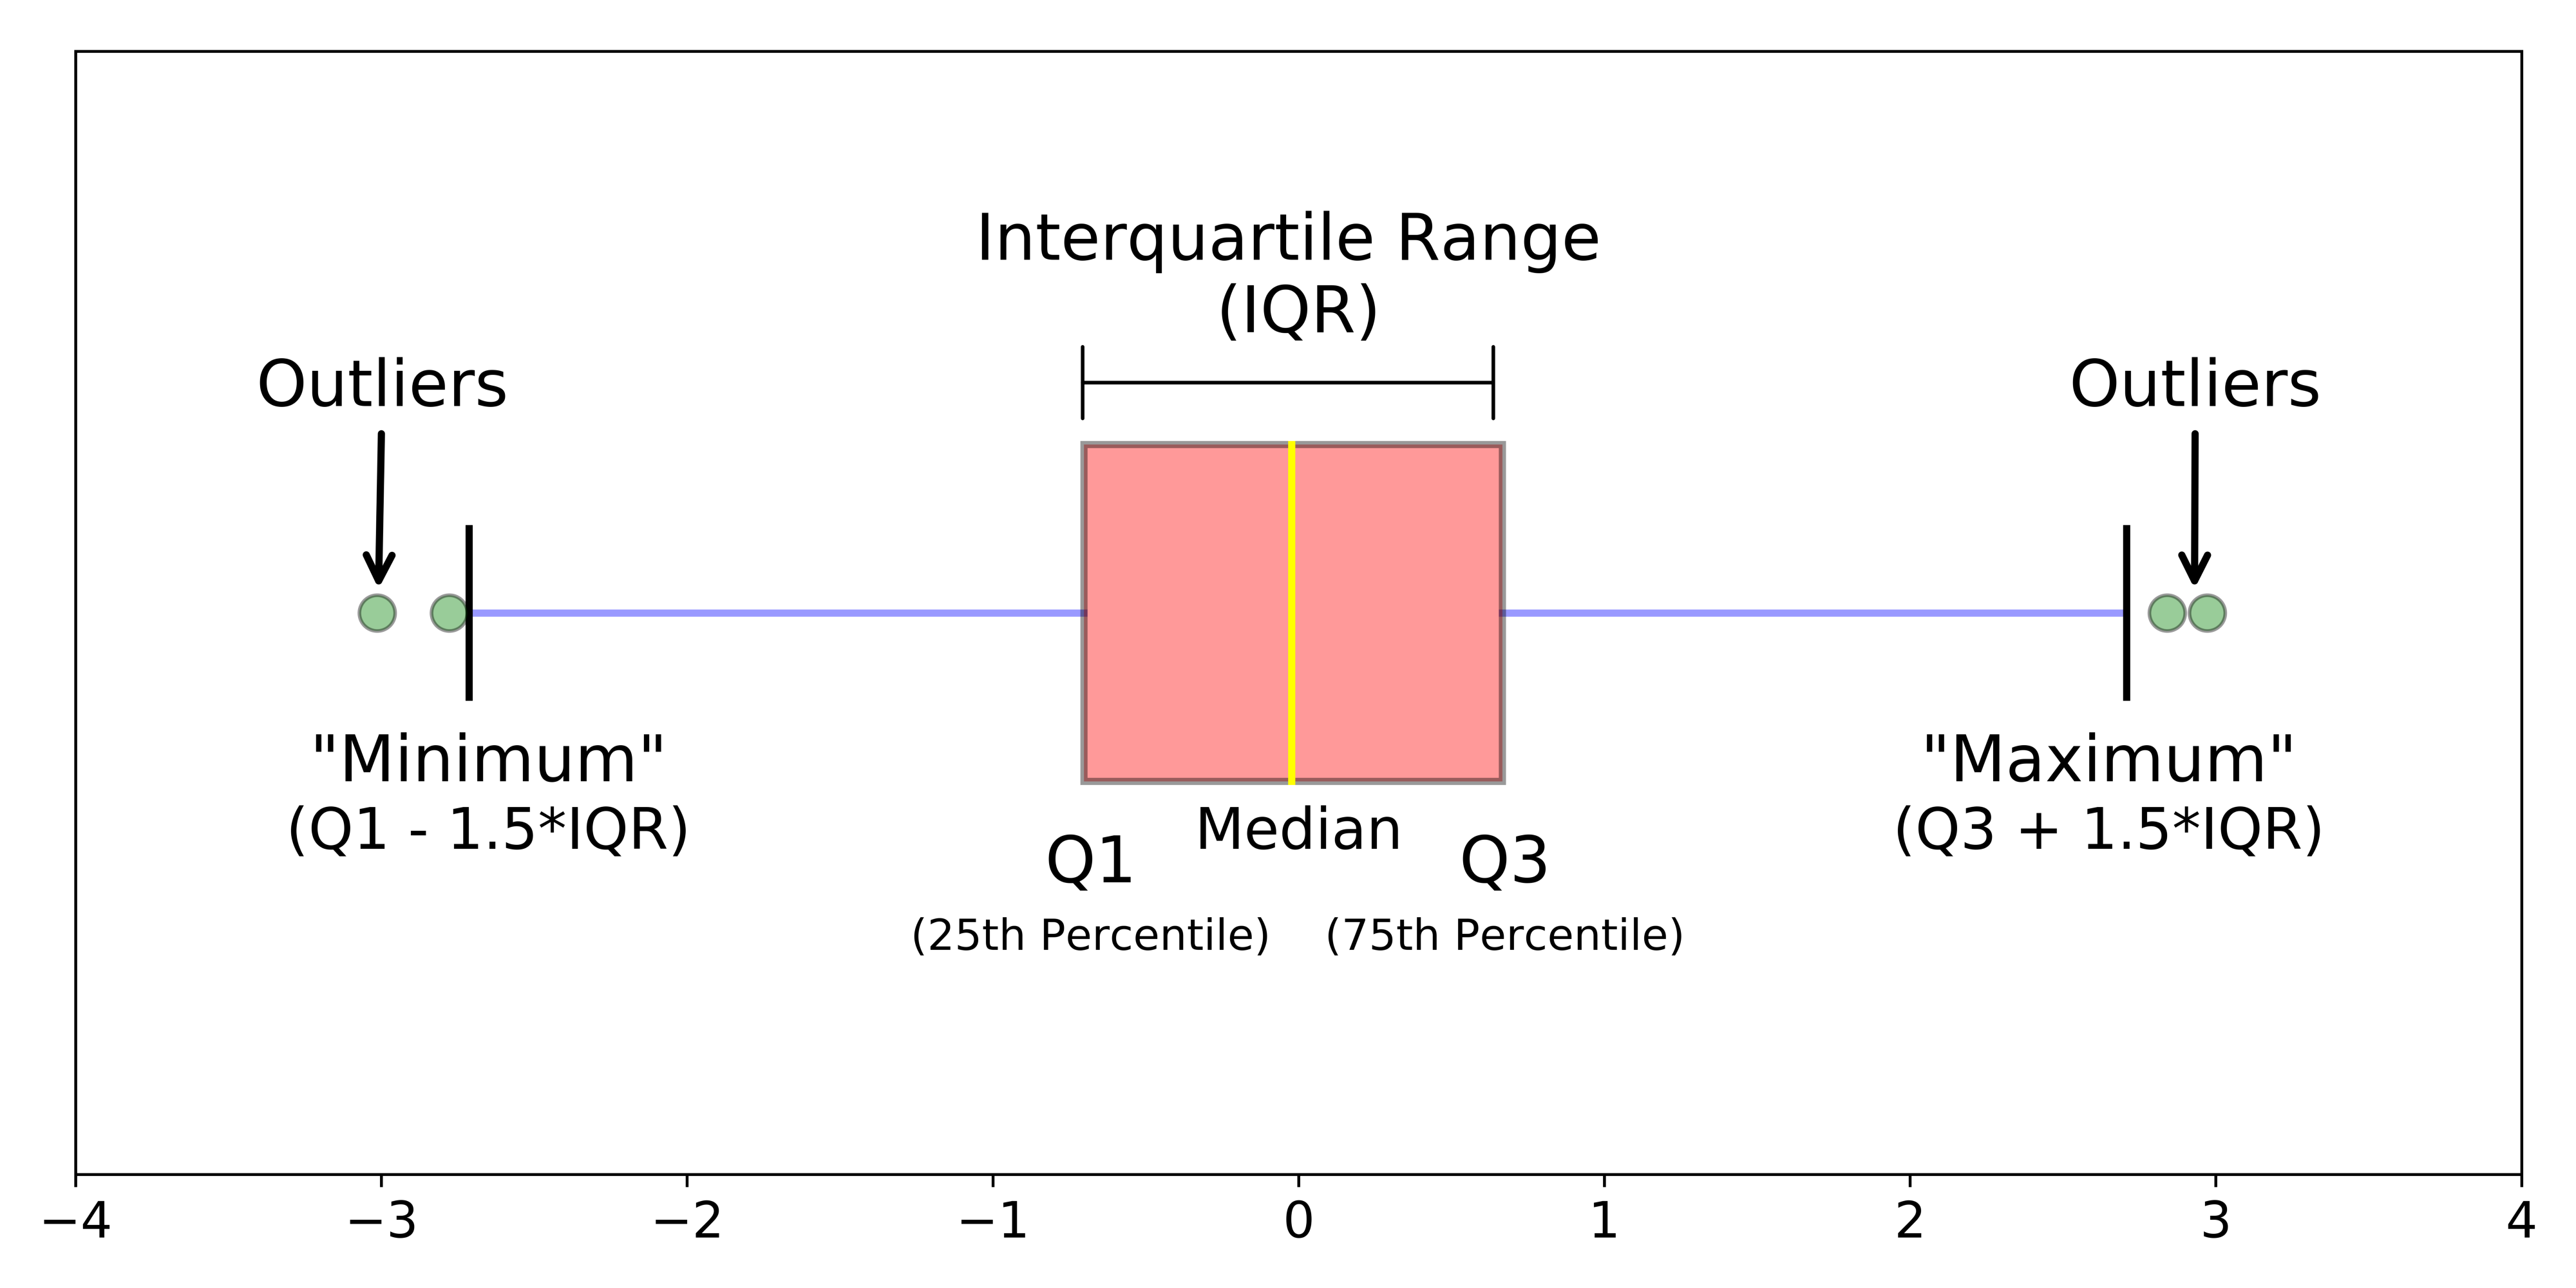

<AxesSubplot:xlabel='DIS'>

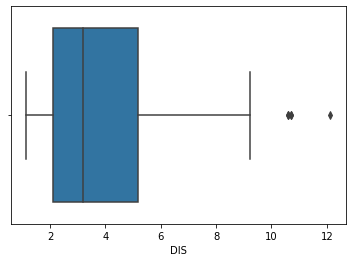

In [8]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

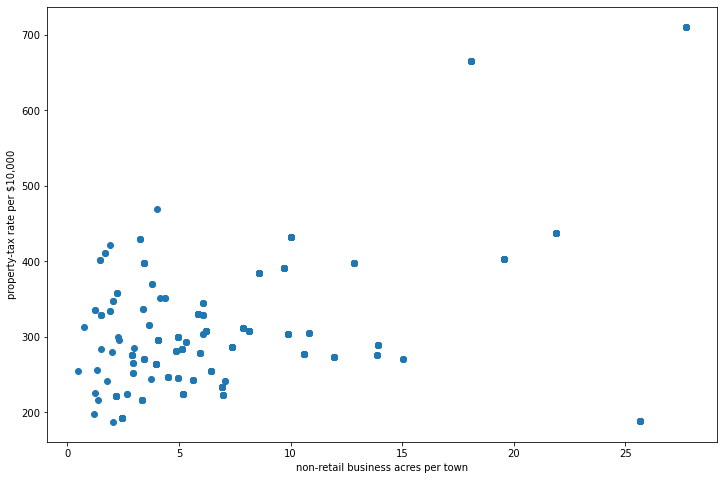

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('non-retail business acres per town')
ax.set_ylabel('property-tax rate per $10,000')
plt.show()

## **Using the Z-score**

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

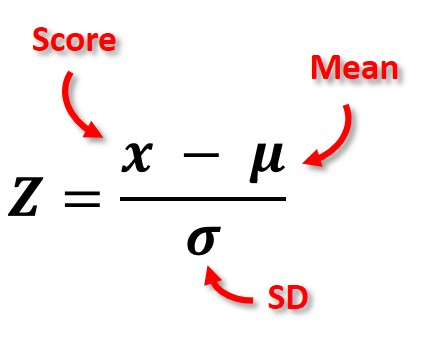

In [11]:
from scipy import stats

z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [14]:
threshold = 3
print(np.where(z > 3)) # It gives row numbers and columns number respectively

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

Don’t be confused by the results. The first array contains the list of row numbers and second array contains the respective column numbers.

For example:  z[55][1] is having a Z-score higher than 3.

Meaning the data point at 55th record(row) on column 1 is an outlier

In [15]:
z[55][1]

3.375038763517309

In [16]:
boston_df_o = boston_df_o[(z < 3).all(axis=1)]

In [17]:
boston_df.shape #shape before removing outlier

(506, 13)

In [18]:
boston_df_o.shape #shape after removing outlier

(415, 13)

<AxesSubplot:xlabel='DIS'>

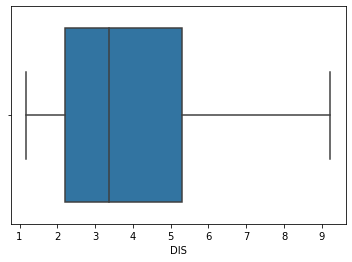

In [19]:
#Let's confirm if the Outliers have been removed

sns.boxplot(x=boston_df_o['DIS'])

## **Using IQR Range**


In [20]:
boston_df_o1 = boston_df.copy()

In [21]:
Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64



[Read more about why 1.5 is used](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097)

In [23]:
maskofiqr = (boston_df_o1 < (Q1 - 1.5 * IQR)) | (boston_df_o1 > (Q3 + 1.5 * IQR))
boston_df_out = boston_df_o1[~(maskofiqr).any(axis=1)]

In [24]:
boston_df.shape #shape before removing outlier

(506, 13)

In [25]:

boston_df_out.shape #shape after removing outlier

(274, 13)

<AxesSubplot:xlabel='DIS'>

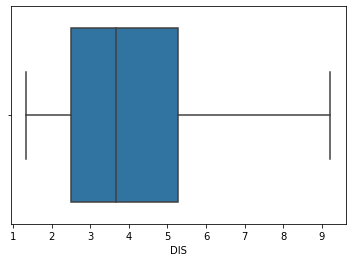

In [27]:
#Let's confirm if the Outliers have been removed
sns.boxplot(x=boston_df_out['DIS'])

# **Using Function**

In [28]:
def remove_outliers(df):
    outliers = {}
    for col in df.columns:
        if str(df[col].dtype) != 'object':
            df = df[np.abs(df[col]-df[col].mean()) < (3*df[col].std())]
            olrs = df[~(np.abs(df[col]-df[col].mean()) < (3*df[col].std()))]
            outliers = pd.DataFrame(olrs)
    return print('These Outliers Have Been Removed From Your dataset:\n\n',outliers,'\n\n\nNew Shape Of Dataset\n\n',df.shape)

In [29]:
remove_outliers(boston_df)

These Outliers Have Been Removed From Your dataset:

         CRIM   ZN  INDUS  CHAS  NOX   RM   AGE     DIS   RAD    TAX  PTRATIO  \
387  22.5971  0.0   18.1   0.0  0.7  5.0  89.5  1.5184  24.0  666.0     20.2   

         B  LSTAT  
387  396.9  31.99   


New Shape Of Dataset

 (412, 13)


# **Automatic Outlier Detection**

### One-Class Classification(OCC)

In machine learning, an approach to tackling the problem of outlier detection is one-class classification.

One-Class Classification, or OCC for short, involves fitting a model on the “normal” data and predicting whether new data is normal or an outlier/anomaly.

One technique to use is **local outlier factor, or LOF** for short

For the demonstration purpose, we will use the Boston housing regression problem that has 13 inputs and one numerical target and requires learning the relationship between suburb characteristics and house prices.

In [41]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

print(x.shape, y.shape) #print the shape of X and y

(506, 13) (506,)


In [43]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


Since this is a regression problem, we will fit a linear regression algorithm and evaluate model performance by training the model on the test dataset and making a prediction on the test data and evaluate the predictions using the mean absolute error (MAE).



In [44]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


In this case, we can see that the model achieved a MAE of about 3.417.

We can now try removing outliers from the training dataset.

In this case we assume that the outliers are causing the linear regression model to learn a bias or skewed understanding of the problem and therefore if we are able to remove these outliers from the training set we will be able to allow a more effective model to be learned.

We will be using the [**LocalOutlierFactor**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html) model and using it to make a prediction on the training dataset, marking each row in the training dataset as normal (1) or an outlier (-1). We will use the default hyperparameters for the outlier detection model, although it is a good idea to tune the configuration to the specifics of your dataset.



In [50]:
# identify outliers in the training dataset
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train) # it returns 1 or -1, 1 means no outliers, -1 means outliers

In [49]:
yhat

array([ 1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1

In [51]:
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [52]:
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('\nMAE: %.3f' % mae)

(305, 13) (305,)

MAE: 3.356


From above, we can see that the number of examples in the training dataset has been reduced from **339** to **305**, indicating that **34** rows containing outliers were identified and deleted.

Again, MAE has reduced from about **3.417** by a model fit on the entire training dataset, to about **3.356** on a model fit on the dataset with outliers removed.

<hr/>

<hr/>

## Outlier Engineering - 1


An outlier is a data point which is significantly different from the remaining data. “An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.” [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980].

Statistics such as the mean and variance are very susceptible to outliers. In addition, **some Machine Learning models are sensitive to outliers** which may decrease their performance. Thus, depending on which algorithm we wish to train, we often remove outliers from our variables.

We discussed in section 3 of this course how to identify outliers. In this section, we we discuss how we can process them to train our machine learning models.


## How can we pre-process outliers?

- Trimming: remove the outliers from our dataset
- Treat outliers as missing data, and proceed with any missing data imputation technique
- Discrestisation: outliers are placed in border bins together with higher or lower values of the distribution
- Censoring: capping the variable distribution at a max and / or minimum value

**Censoring** is also known as:

- top and bottom coding
- winsorization
- capping


## Trimming or truncation

Trimming, also known as truncation, involves removing the outliers from the dataset. We only need to decide on a metric to determine outliers. As we saw in section 3, this can be the Gaussian approximation for normally distributed variables or the inter-quantile range proximity rule for skewed variables.

### Advantages

- quick

### Limitations

- outliers for one variable could contain useful information in the other variables
- if there are outliers across many variables, we could remove a big chunk of dataset

## In this Demo

We will see how to perform trimming using the Boston House Dataset

## Important

Outliers should be detected AND **removed ONLY** from the training set, and NOT from the test set.

So we should first divide our data set into train and tests, and remove outliers in the train set, but keep those in the test set, and measure how well our model is doing.

In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

In [55]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]

boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [56]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

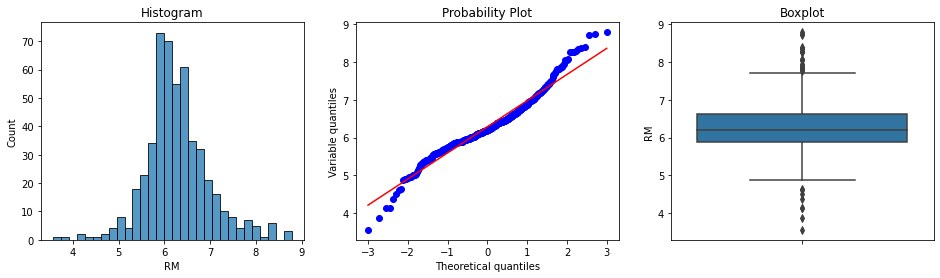

In [57]:
# let's find outliers in RM

diagnostic_plots(boston, 'RM')

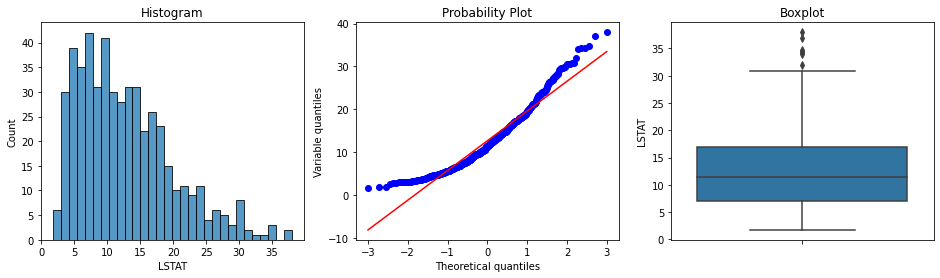

In [58]:
# visualise outliers in LSTAT

diagnostic_plots(boston, 'LSTAT')

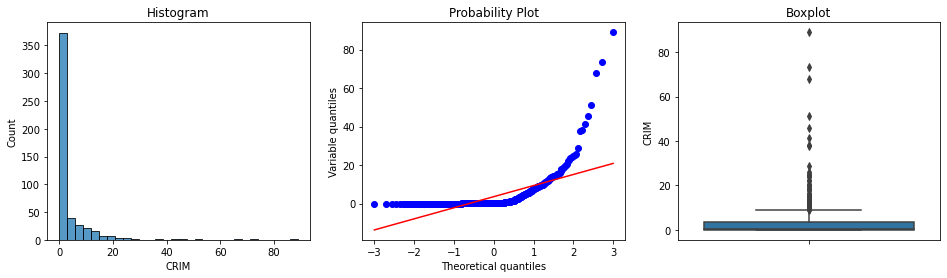

In [59]:
# outliers in CRIM

diagnostic_plots(boston, 'CRIM')

There are outliers in all of the above variables. RM shows outliers in both tails, whereas LSTAT and CRIM only on the right tail.

To find the outliers, let's re-utilise the function we learned in section 3:

In [60]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [61]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_skewed_boundaries(boston, 'RM', 1.5)
RM_upper_limit, RM_lower_limit

(7.730500000000001, 4.778499999999999)

In [62]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_skewed_boundaries(boston, 'LSTAT', 1.5)
LSTAT_upper_limit, LSTAT_lower_limit

(31.962500000000006, -8.057500000000005)

In [63]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_skewed_boundaries(boston, 'CRIM', 1.5)
CRIM_upper_limit, CRIM_lower_limit

(9.06963875, -5.31051125)

In [64]:
# let's flag the outliers in the data set

outliers_RM = np.where(boston['RM'] > RM_upper_limit, True,
                       np.where(boston['RM'] < RM_lower_limit, True, False))

In [65]:
# let's flag the outliers in the data set

outliers_LSTAT = np.where(boston['LSTAT'] > LSTAT_upper_limit, True,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, True, False))

In [66]:
# let's flag the outliers in the data set

outliers_CRIM = np.where(boston['CRIM'] > CRIM_upper_limit, True,
                       np.where(boston['CRIM'] < CRIM_lower_limit, True, False))

In [67]:
# let's trimm the dataset

boston_trimmed = boston.loc[~(outliers_RM + outliers_LSTAT + outliers_CRIM), ]

boston.shape, boston_trimmed.shape

((506, 3), (416, 3))

We can see that using trimming, we removed almost 100 rows, from a dataset of 500 rows, this is about 20% of the data was removed. This is mostly why, we do not tend to use trimming much in machine learning. But if only a few variables present a tiny proportion of outliers, trimming could work.

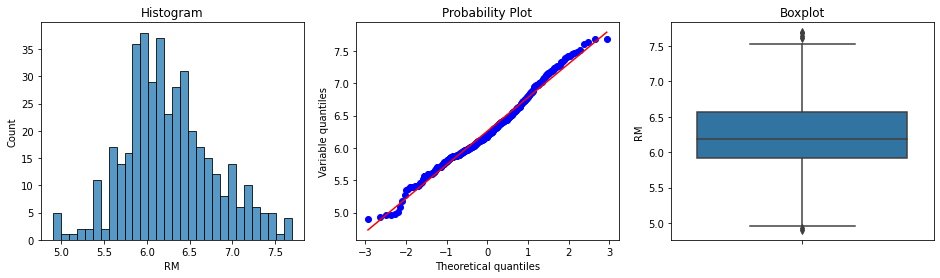

In [68]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset

diagnostic_plots(boston_trimmed, 'RM')

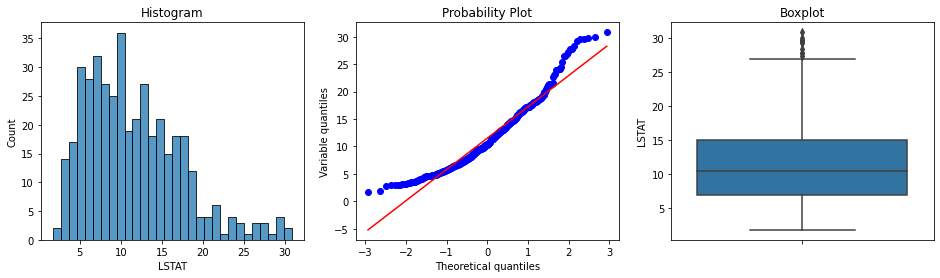

In [69]:
diagnostic_plots(boston_trimmed, 'LSTAT')

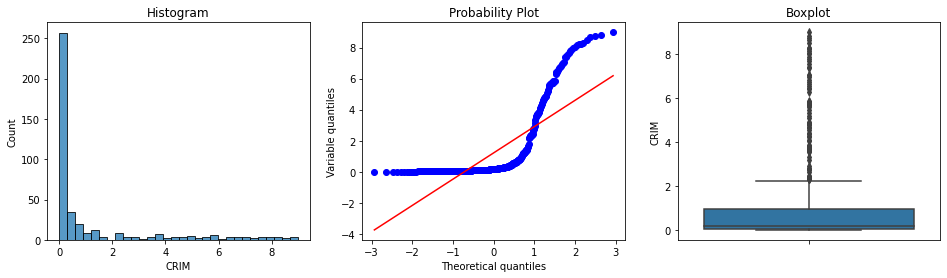

In [70]:
diagnostic_plots(boston_trimmed, 'CRIM')

For LSTAT and CRIM, we still see many outliers. When we remove data points from our dataset, all the parameters of the distribution are re-calculated, those are the mean, quantiles and inter-quantile range, therefore, in the new -trimmed- variable, values that before were not considered outliers, now are.

This is an unwanted characteristic of this way of coping with outliers.

## New: outlier trimming with Feature-engine

Find out how to trim outliers with Feature-engine in the documentation:

https://feature-engine.readthedocs.io/en/latest/outliers/OutlierTrimmer.html

## Outlier Engineering - 2


An outlier is a data point which is significantly different from the remaining data. “An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.” [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980].

Statistics such as the mean and variance are very susceptible to outliers. In addition, **some Machine Learning models are sensitive to outliers** which may decrease their performance. Thus, depending on which algorithm we wish to train, we often remove outliers from our variables.

We discussed in section 3 of this course how to identify outliers. In this section, we we discuss how we can process them to train our machine learning models.


## How can we pre-process outliers?

- Trimming: remove the outliers from our dataset
- Treat outliers as missing data, and proceed with any missing data imputation technique
- Discrestisation: outliers are placed in border bins together with higher or lower values of the distribution
- Censoring: capping the variable distribution at a max and / or minimum value

**Censoring** is also known as:

- top and bottom coding
- winsorization
- capping


## Censoring or Capping.

**Censoring**, or **capping**, means capping the maximum and /or minimum of a distribution at an arbitrary value. On other words, values bigger or smaller than the arbitrarily determined ones are **censored**.

Capping can be done at both tails, or just one of the tails, depending on the variable and the user.

Check my talk in [pydata](https://www.youtube.com/watch?v=KHGGlozsRtA) for an example of capping used in a finance company.

The numbers at which to cap the distribution can be determined:

- arbitrarily
- using the inter-quantal range proximity rule
- using the gaussian approximation
- using quantiles


### Advantages

- does not remove data

### Limitations

- distorts the distributions of the variables
- distorts the relationships among variables


## In this Demo

We will see how to perform capping with the inter-quantile range proximity rule using the Boston House Dataset

## Important

When doing capping, we tend to cap values both in train and test set. It is important to remember that the capping values MUST be derived from the train set. And then use those same values to cap the variables in the test set

I will not do that in this demo, but please keep that in mind when setting up your pipelines

In [71]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

from feature_engine.outliers import Winsorizer

In [72]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


In [73]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

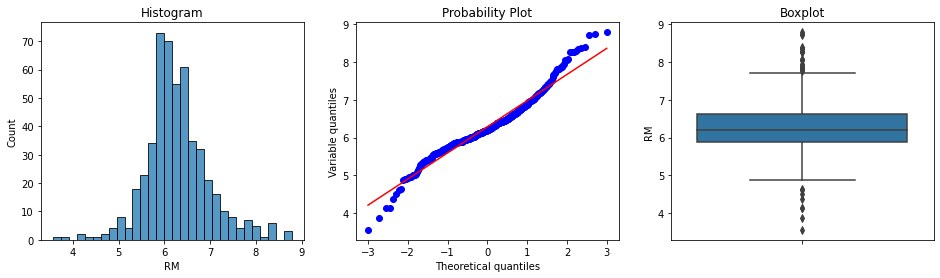

In [74]:
# let's find outliers in RM

diagnostic_plots(boston, 'RM')

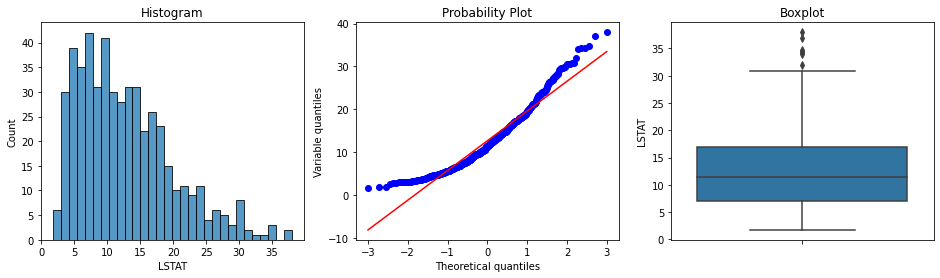

In [75]:
# visualise outliers in LSTAT

diagnostic_plots(boston, 'LSTAT')

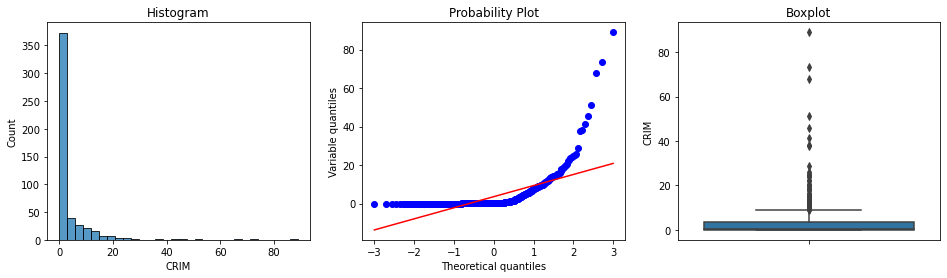

In [76]:
# outliers in CRIM

diagnostic_plots(boston, 'CRIM')

There are outliers in all of the above variables. RM shows outliers in both tails, whereas LSTAT and CRIM only on the right tail.

To find the outliers, let's re-utilise the function we learned in section 3:

In [77]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [78]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_skewed_boundaries(boston, 'RM', 1.5)
RM_upper_limit, RM_lower_limit

(7.730500000000001, 4.778499999999999)

In [79]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_skewed_boundaries(boston, 'LSTAT', 1.5)
LSTAT_upper_limit, LSTAT_lower_limit

(31.962500000000006, -8.057500000000005)

In [80]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_skewed_boundaries(boston, 'CRIM', 1.5)
CRIM_upper_limit, CRIM_lower_limit

(9.06963875, -5.31051125)

In [81]:
# Now let's replace the outliers by the maximum and minimum limit

boston['RM']= np.where(boston['RM'] > RM_upper_limit, RM_upper_limit,
                       np.where(boston['RM'] < RM_lower_limit, RM_lower_limit, boston['RM']))

In [82]:
# Now let's replace the outliers by the maximum and minimum limit

boston['LSTAT']= np.where(boston['LSTAT'] > LSTAT_upper_limit, LSTAT_upper_limit,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, LSTAT_lower_limit, boston['LSTAT']))

In [83]:
# Now let's replace the outliers by the maximum and minimum limit

boston['CRIM']= np.where(boston['CRIM'] > CRIM_upper_limit, CRIM_upper_limit,
                       np.where(boston['CRIM'] < CRIM_lower_limit, CRIM_lower_limit, boston['CRIM']))

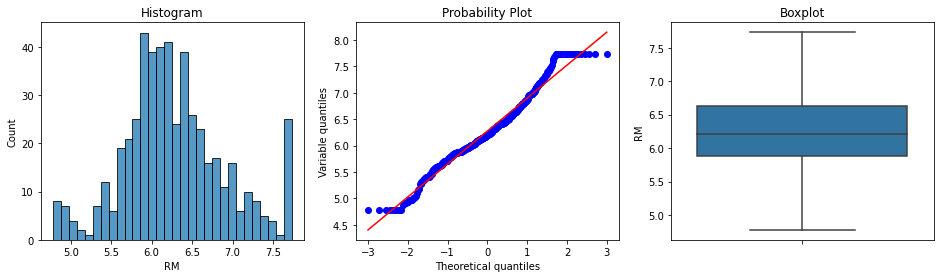

In [84]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset

diagnostic_plots(boston, 'RM')

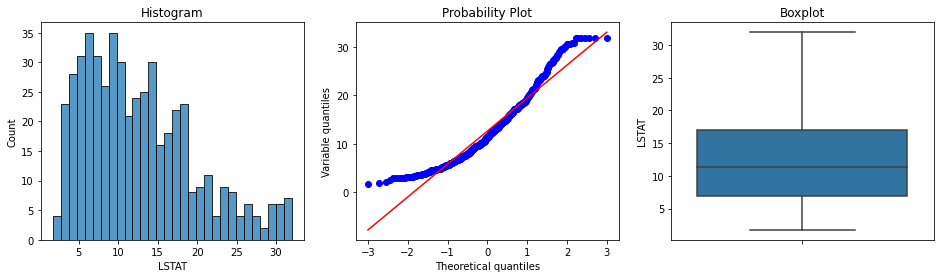

In [85]:
diagnostic_plots(boston, 'LSTAT')

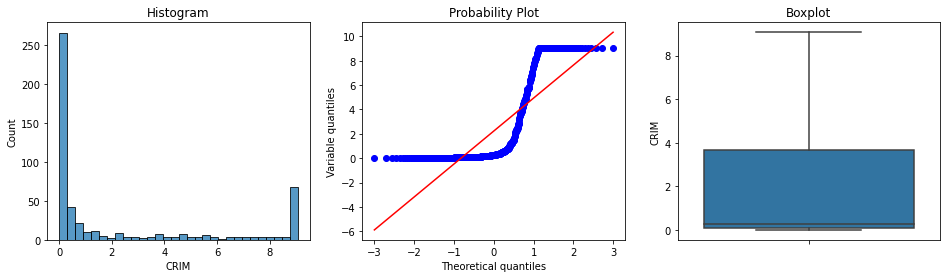

In [86]:
diagnostic_plots(boston, 'CRIM')

We can see that the outliers are gone, but the variable distribution was distorted quite a bit.

## Censoring with Feature-engine

In [87]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


In [88]:
# create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['RM', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['RM', 'LSTAT', 'CRIM'])

In [89]:
boston_t = windsoriser.transform(boston)

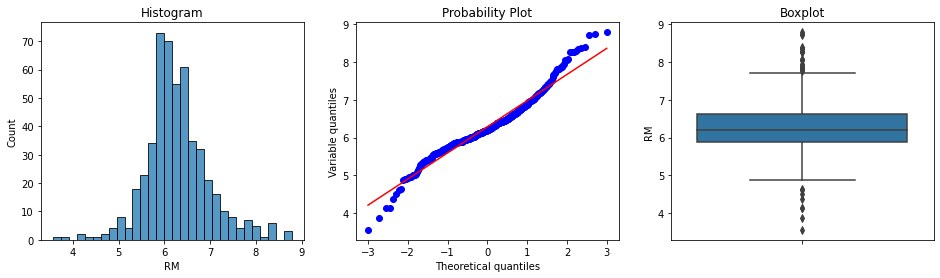

In [90]:
diagnostic_plots(boston, 'RM')

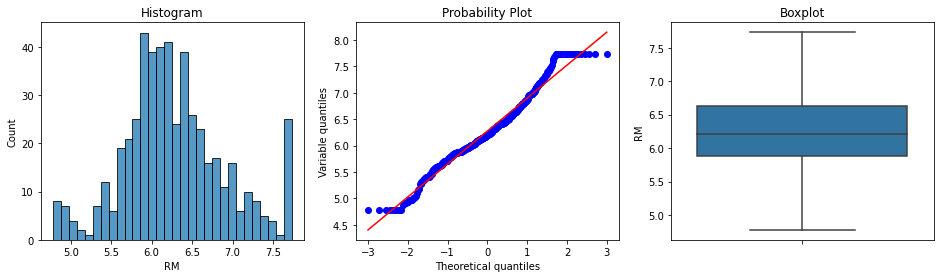

In [91]:
diagnostic_plots(boston_t, 'RM')

In [92]:
# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_

{'RM': 4.778499999999999, 'LSTAT': -8.057500000000005, 'CRIM': -5.31051125}

In [93]:
# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_

{'RM': 7.730500000000001, 'LSTAT': 31.962500000000006, 'CRIM': 9.06963875}

## Outlier Engineering - 3


An outlier is a data point which is significantly different from the remaining data. “An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.” [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980].

Statistics such as the mean and variance are very susceptible to outliers. In addition, **some Machine Learning models are sensitive to outliers** which may decrease their performance. Thus, depending on which algorithm we wish to train, we often remove outliers from our variables.

We discussed in section 3 of this course how to identify outliers. In this section, we we discuss how we can process them to train our machine learning models.


## How can we pre-process outliers?

- Trimming: remove the outliers from our dataset
- Treat outliers as missing data, and proceed with any missing data imputation technique
- Discrestisation: outliers are placed in border bins together with higher or lower values of the distribution
- Censoring: capping the variable distribution at a max and / or minimum value

**Censoring** is also known as:

- top and bottom coding
- windsorisation
- capping


## Censoring or Capping.

**Censoring**, or **capping**, means capping the maximum and /or minimum of a distribution at an arbitrary value. On other words, values bigger or smaller than the arbitrarily determined ones are **censored**.

Capping can be done at both tails, or just one of the tails, depending on the variable and the user.

Check my talk in [pydata](https://www.youtube.com/watch?v=KHGGlozsRtA) for an example of capping used in a finance company.

The numbers at which to cap the distribution can be determined:

- arbitrarily
- using the inter-quantal range proximity rule
- using the gaussian approximation
- using quantiles


### Advantages

- does not remove data

### Limitations

- distorts the distributions of the variables
- distorts the relationships among variables


## In this Demo

We will see how to perform capping with the gaussian approximation using the Boston House Dataset

## Important

When doing capping, we tend to cap values both in train and test set. It is important to remember that the capping values MUST be derived from the train set. And then use those same values to cap the variables in the test set

I will not do that in this demo, but please keep that in mind when setting up your pipelines

In [94]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

from feature_engine.outliers import Winsorizer

In [95]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


In [96]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

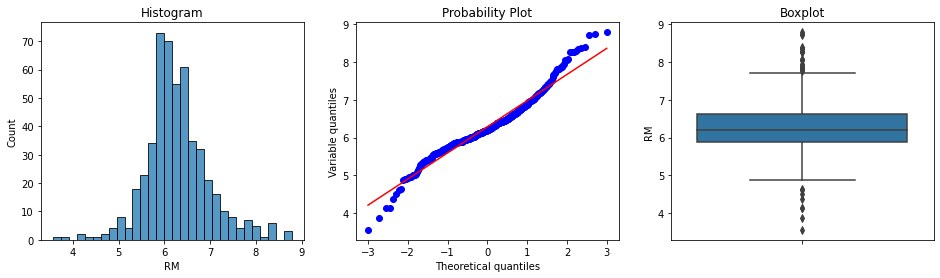

In [97]:
# let's find outliers in RM

diagnostic_plots(boston, 'RM')

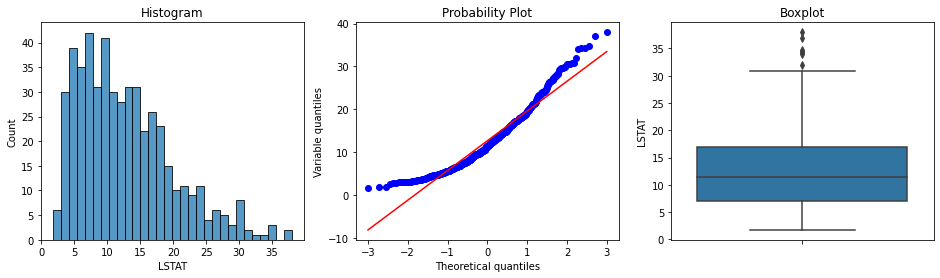

In [98]:
# visualise outliers in LSTAT

diagnostic_plots(boston, 'LSTAT')

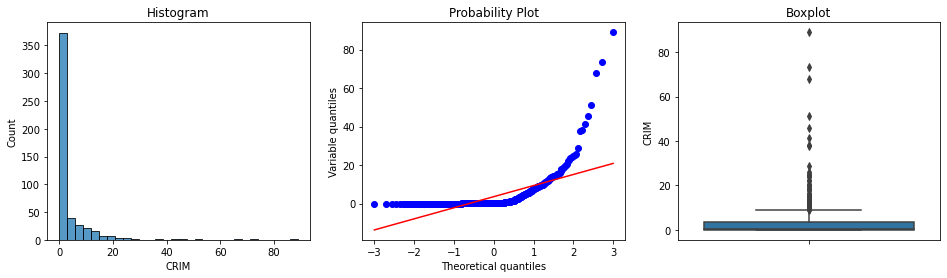

In [99]:
# outliers in CRIM

diagnostic_plots(boston, 'CRIM')

There are outliers in all of the above variables. RM shows outliers in both tails, whereas LSTAT and CRIM only on the right tail.

To find the outliers, let's re-utilise the function we learned in section 3:

In [100]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

In [101]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_normal_boundaries(boston, 'RM', 3)
RM_upper_limit, RM_lower_limit

(8.392485817597748, 4.176782957105809)

In [102]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_normal_boundaries(boston, 'LSTAT', 3)
LSTAT_upper_limit, LSTAT_lower_limit

(34.07624777515244, -8.770121292938992)

In [103]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_normal_boundaries(boston, 'CRIM', 3)
CRIM_upper_limit, CRIM_lower_limit

(29.41815887330972, -22.19111175868521)

In [104]:
# Now let's replace the outliers by the maximum and minimum limit

boston['RM']= np.where(boston['RM'] > RM_upper_limit, RM_upper_limit,
                       np.where(boston['RM'] < RM_lower_limit, RM_lower_limit, boston['RM']))

In [105]:
# Now let's replace the outliers by the maximum and minimum limit

boston['LSTAT']= np.where(boston['LSTAT'] > LSTAT_upper_limit, LSTAT_upper_limit,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, LSTAT_lower_limit, boston['LSTAT']))

In [106]:
# Now let's replace the outliers by the maximum and minimum limit

boston['CRIM']= np.where(boston['CRIM'] > CRIM_upper_limit, CRIM_upper_limit,
                       np.where(boston['CRIM'] < CRIM_lower_limit, CRIM_lower_limit, boston['CRIM']))

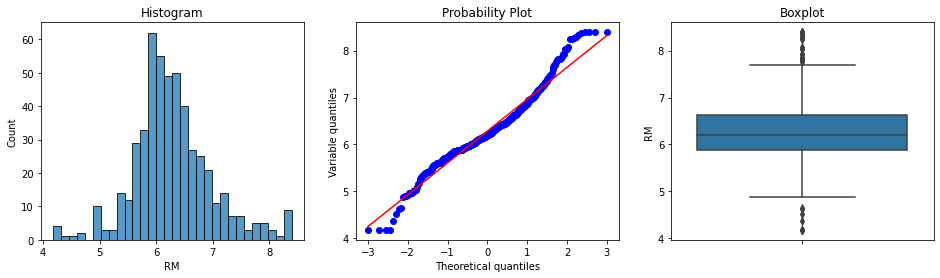

In [107]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset

diagnostic_plots(boston, 'RM')

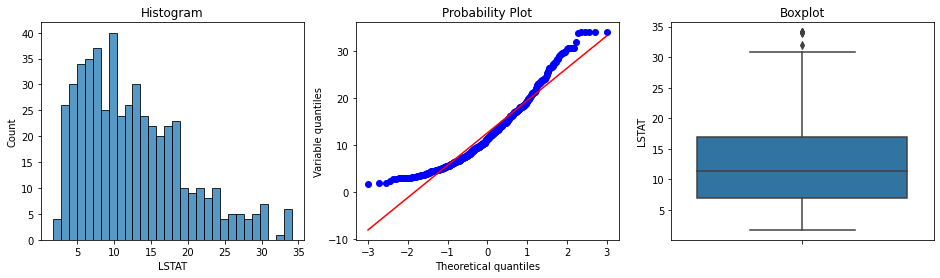

In [108]:
diagnostic_plots(boston, 'LSTAT')

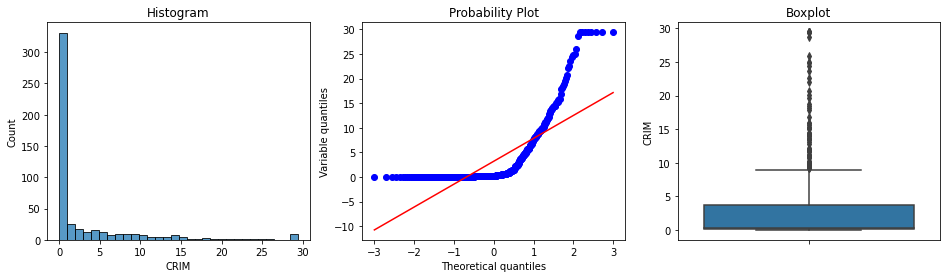

In [109]:
diagnostic_plots(boston, 'CRIM')

None of these variables are normally distributed, that is probably why the Gaussian approximation was not so effective to remove outliers. We could try and use a smaller distance, instead of multiplying by 3 times the std, we could 2 times or 1.5. But those numbers are set arbitrarily, and do not pose much statistical sense, therefore defeating the point of using the Gaussian approximation.

If this capping does not work as desired, I recommend you use the IQR rule as we discussed in the previous notebook, or quantiles, as we will see in the next one.

## Censoring with feature-engine

In [110]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


In [111]:
# create the capper

windsoriser = Winsorizer(capping_method='gaussian', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['RM', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

Winsorizer(tail='both', variables=['RM', 'LSTAT', 'CRIM'])

In [112]:
boston_t = windsoriser.transform(boston)

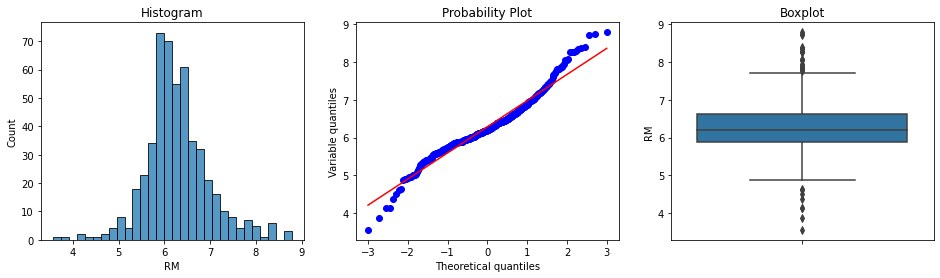

In [113]:
diagnostic_plots(boston, 'RM')

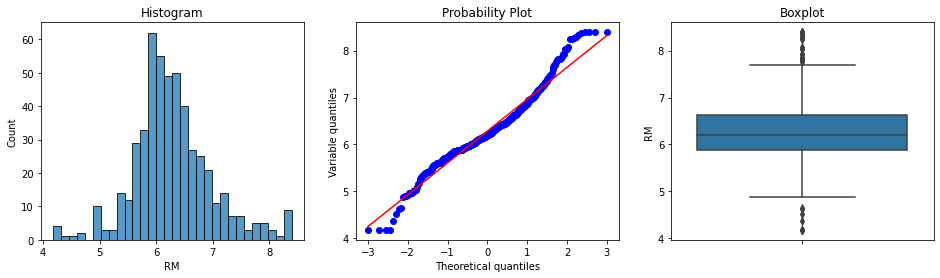

In [114]:
diagnostic_plots(boston_t, 'RM')

In [115]:
# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_

{'RM': 4.176782957105809,
 'LSTAT': -8.770121292938992,
 'CRIM': -22.19111175868521}

In [116]:
# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_

{'RM': 8.392485817597748,
 'LSTAT': 34.07624777515244,
 'CRIM': 29.41815887330972}

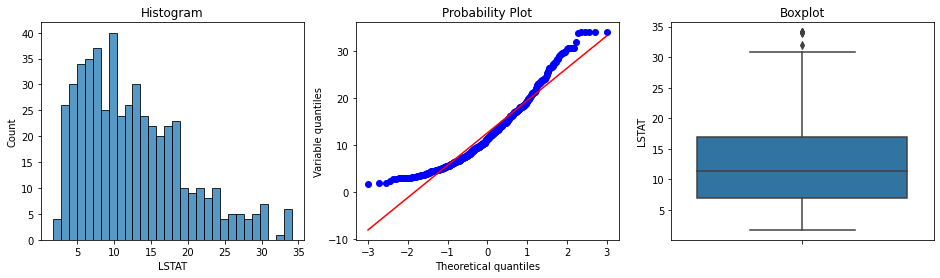

In [117]:
diagnostic_plots(boston_t, 'LSTAT')

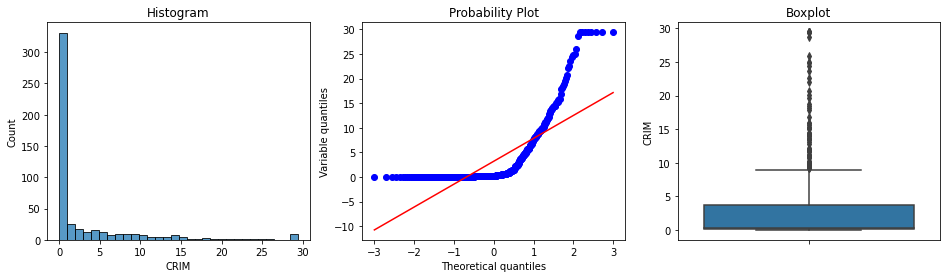

In [118]:
diagnostic_plots(boston_t, 'CRIM')

None of these variables are normally distributed, that is probably why the Gaussian approximation was not so effective to remove outliers. We could try and use a smaller distance, instead of multiplying by 3 times the std, we could 2 times or 1.5. But those numbers are set arbitrarily, and do not pose much statistical sense, therefore defeating the point of using the Gaussian approximation.

If this capping does not work as desired, I recommend you use the IQR rule as we discussed in the previous notebook, or quantiles, as we will see in the next one.

## Outlier Engineering - 4


An outlier is a data point which is significantly different from the remaining data. “An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.” [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980].

Statistics such as the mean and variance are very susceptible to outliers. In addition, **some Machine Learning models are sensitive to outliers** which may decrease their performance. Thus, depending on which algorithm we wish to train, we often remove outliers from our variables.

We discussed in section 3 of this course how to identify outliers. In this section, we we discuss how we can process them to train our machine learning models.


## How can we pre-process outliers?

- Trimming: remove the outliers from our dataset
- Treat outliers as missing data, and proceed with any missing data imputation technique
- Discrestisation: outliers are placed in border bins together with higher or lower values of the distribution
- Censoring: capping the variable distribution at a max and / or minimum value

**Censoring** is also known as:

- top and bottom coding
- windsorisation
- capping


## Censoring or Capping.

**Censoring**, or **capping**, means capping the maximum and /or minimum of a distribution at an arbitrary value. On other words, values bigger or smaller than the arbitrarily determined ones are **censored**.

Capping can be done at both tails, or just one of the tails, depending on the variable and the user.

Check my talk in [pydata](https://www.youtube.com/watch?v=KHGGlozsRtA) for an example of capping used in a finance company.

The numbers at which to cap the distribution can be determined:

- arbitrarily
- using the inter-quantal range proximity rule
- using the gaussian approximation
- using quantiles


### Advantages

- does not remove data

### Limitations

- distorts the distributions of the variables
- distorts the relationships among variables


## In this Demo

We will see how to perform capping with the quantiles using the Boston House Dataset

## Important

When doing capping, we tend to cap values both in train and test set. It is important to remember that the capping values MUST be derived from the train set. And then use those same values to cap the variables in the test set

I will not do that in this demo, but please keep that in mind when setting up your pipelines

In [119]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

from feature_engine.outliers import Winsorizer

In [120]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


In [121]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

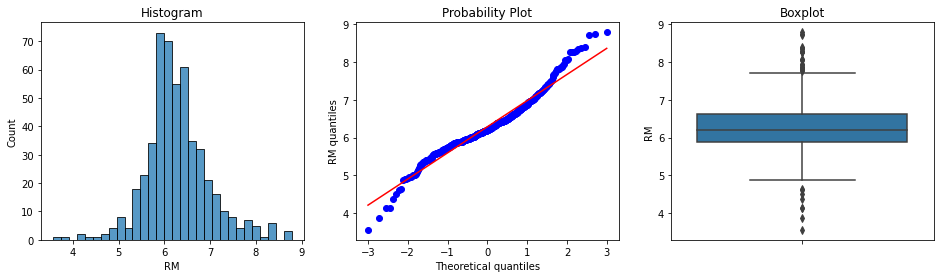

In [122]:
# let's find outliers in RM

diagnostic_plots(boston, 'RM')

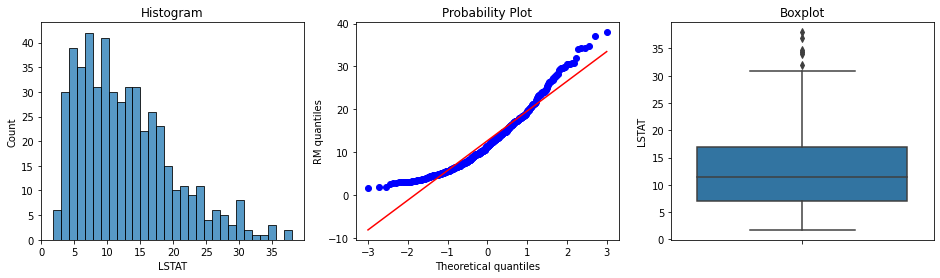

In [123]:
# visualise outliers in LSTAT

diagnostic_plots(boston, 'LSTAT')

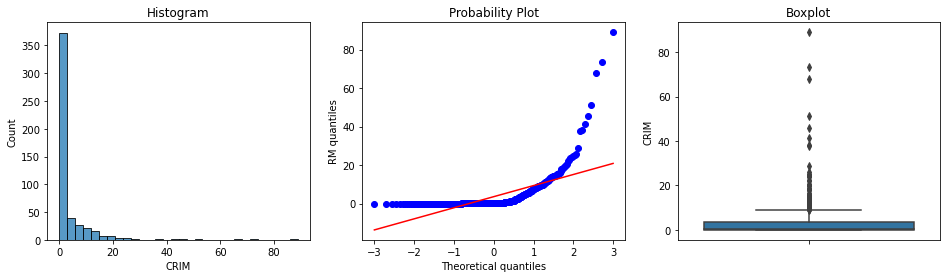

In [124]:
# outliers in CRIM

diagnostic_plots(boston, 'CRIM')

There are outliers in all of the above variables. RM shows outliers in both tails, whereas LSTAT and CRIM only on the right tail.

To find the outliers, let's re-utilise the function we learned in section 3:

In [125]:
def find_boundaries(df, variable):

    # the boundaries are the quantiles

    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)

    return upper_boundary, lower_boundary

In [126]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM')
RM_upper_limit, RM_lower_limit

(7.5875, 5.314)

In [127]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_boundaries(boston, 'LSTAT')
LSTAT_upper_limit, LSTAT_lower_limit

(26.8075, 3.7075)

In [128]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_boundaries(boston, 'CRIM')
CRIM_upper_limit, CRIM_lower_limit

(15.78915, 0.027909999999999997)

In [129]:
# Now let's replace the outliers by the maximum and minimum limit

boston['RM']= np.where(boston['RM'] > RM_upper_limit, RM_upper_limit,
                       np.where(boston['RM'] < RM_lower_limit, RM_lower_limit, boston['RM']))

In [130]:
# Now let's replace the outliers by the maximum and minimum limit

boston['LSTAT']= np.where(boston['LSTAT'] > LSTAT_upper_limit, LSTAT_upper_limit,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, LSTAT_lower_limit, boston['LSTAT']))

In [131]:
# Now let's replace the outliers by the maximum and minimum limit

boston['CRIM']= np.where(boston['CRIM'] > CRIM_upper_limit, CRIM_upper_limit,
                       np.where(boston['CRIM'] < CRIM_lower_limit, CRIM_lower_limit, boston['CRIM']))

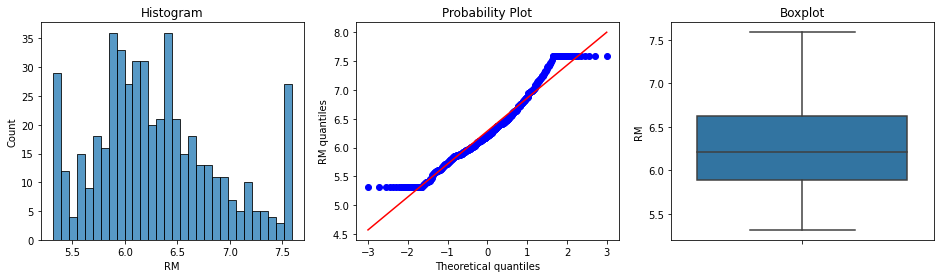

In [132]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset

diagnostic_plots(boston, 'RM')

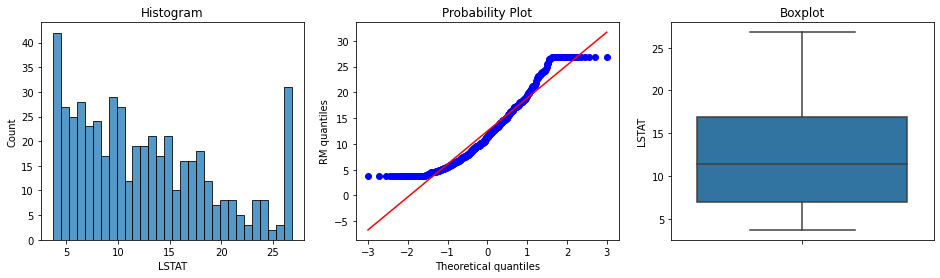

In [133]:
diagnostic_plots(boston, 'LSTAT')

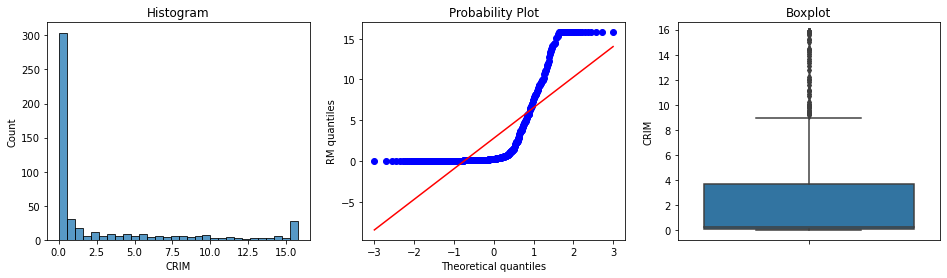

In [134]:
diagnostic_plots(boston, 'CRIM')

We can see that the outliers are gone, but the variable distribution was distorted quite a bit.

## Censoring with feature-engine

In [135]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


In [136]:
# create the capper

windsoriser = Winsorizer(capping_method='quantiles', # choose from iqr, gaussian or quantiles
                          tail='both', # cap left, right or both tails 
                          fold=0.05,
                          variables=['RM', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['RM', 'LSTAT', 'CRIM'])

In [137]:
boston_t = windsoriser.transform(boston)

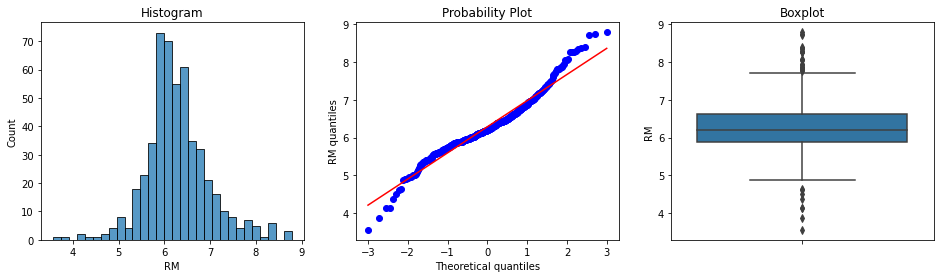

In [138]:
diagnostic_plots(boston, 'RM')

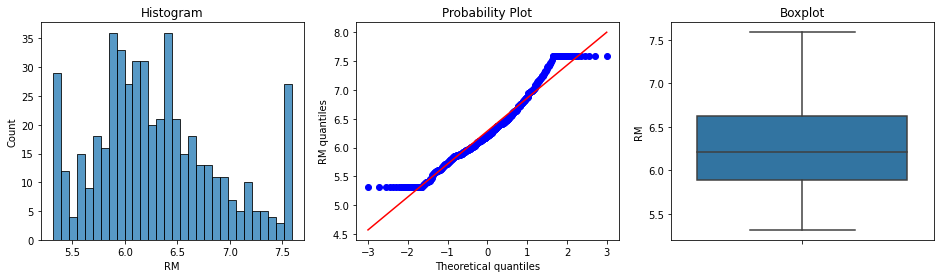

In [139]:
diagnostic_plots(boston_t, 'RM')

In [140]:
# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_

{'RM': 5.314, 'LSTAT': 3.7075, 'CRIM': 0.027909999999999997}

In [141]:
# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_

{'RM': 7.5875, 'LSTAT': 26.8075, 'CRIM': 15.78915}

## Outlier Engineering - 5


An outlier is a data point which is significantly different from the remaining data. “An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.” [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980].

Statistics such as the mean and variance are very susceptible to outliers. In addition, **some Machine Learning models are sensitive to outliers** which may decrease their performance. Thus, depending on which algorithm we wish to train, we often remove outliers from our variables.

We discussed in section 3 of this course how to identify outliers. In this section, we we discuss how we can process them to train our machine learning models.


## How can we pre-process outliers?

- Trimming: remove the outliers from our dataset
- Treat outliers as missing data, and proceed with any missing data imputation technique
- Discrestisation: outliers are placed in border bins together with higher or lower values of the distribution
- Censoring: capping the variable distribution at a max and / or minimum value

**Censoring** is also known as:

- top and bottom coding
- windsorisation
- capping


## Censoring or Capping.

**Censoring**, or **capping**, means capping the maximum and /or minimum of a distribution at an arbitrary value. On other words, values bigger or smaller than the arbitrarily determined ones are **censored**.

Capping can be done at both tails, or just one of the tails, depending on the variable and the user.

Check my talk in [pydata](https://www.youtube.com/watch?v=KHGGlozsRtA) for an example of capping used in a finance company.

The numbers at which to cap the distribution can be determined:

- arbitrarily
- using the inter-quantal range proximity rule
- using the gaussian approximation
- using quantiles


### Advantages

- does not remove data

### Limitations

- distorts the distributions of the variables
- distorts the relationships among variables


## In this Demo

We will see how to perform capping with arbitrary values using the Titanic dataset

## Important

When doing capping, we tend to cap values both in train and test set. It is important to remember that the capping values MUST be derived from the train set. And then use those same values to cap the variables in the test set

I will not do that in this demo, but please keep that in mind when setting up your pipelines

In [142]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from feature_engine.outliers import ArbitraryOutlierCapper

In [145]:
# function to load the titanic dataset

def load_titanic():
    data = pd.read_csv('titanic.csv')
    data['cabin'] = data['cabin'].astype(str).str[0]
    data['pclass'] = data['pclass'].astype('O')
    data['embarked'].fillna('C', inplace=True)
    return data

In [146]:
data = load_titanic()
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C,S,Master
2,1,0,female,2.0000,1,2,151.5500,C,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C,S,Mrs


## ArbitraryOutlierCapper

The ArbitraryOutlierCapper caps the minimum and maximum values by a value determined by the user. 

In [147]:
# let's find out the maximum Age and maximum Fare in the titanic

data.age.max(), data.fare.max()

(80.0, 512.3292)

In [148]:
capper = ArbitraryOutlierCapper(max_capping_dict={'age': 50, 'fare': 200},
                                min_capping_dict=None)
capper.fit(data.fillna(0))

ArbitraryOutlierCapper(max_capping_dict={'age': 50, 'fare': 200})

In [149]:
capper.right_tail_caps_

{'age': 50, 'fare': 200}

In [150]:
capper.left_tail_caps_

{}

In [151]:
temp = capper.transform(data.fillna(0))

temp.age.max(), temp.fare.max()

(50.0, 200.0)

### Minimum capping

In [152]:
capper = ArbitraryOutlierCapper(max_capping_dict=None,
                                min_capping_dict={
                                    'age': 10,
                                    'fare': 100
                                })
capper.fit(data.fillna(0))

ArbitraryOutlierCapper(min_capping_dict={'age': 10, 'fare': 100})

In [156]:
capper.variables_

['age', 'fare']

In [154]:
capper.right_tail_caps_

{}

In [155]:
capper.left_tail_caps_

{'age': 10, 'fare': 100}

In [157]:
temp = capper.transform(data.fillna(0))

temp.age.min(), temp.fare.min()

(10.0, 100.0)

### Both ends capping

In [158]:
capper = ArbitraryOutlierCapper(max_capping_dict={
    'age': 50, 'fare': 200},
    min_capping_dict={
    'age': 10, 'fare': 100})

capper.fit(data.fillna(0))

ArbitraryOutlierCapper(max_capping_dict={'age': 50, 'fare': 200},
                       min_capping_dict={'age': 10, 'fare': 100})

In [159]:
capper.right_tail_caps_

{'age': 50, 'fare': 200}

In [160]:
capper.left_tail_caps_

{'age': 10, 'fare': 100}

In [161]:
temp = capper.transform(data.fillna(0))

temp.age.min(), temp.fare.min()

(10.0, 100.0)

In [162]:
temp.age.max(), temp.fare.max()

(50.0, 200.0)

## Feature-engine

We can also automate this process with Feature-engine:
https://feature-engine.readthedocs.io/en/latest/outliers/ArbitraryOutlierCapper.html